In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Adding Train and Test

In [ ]:
train_data=pd.read_csv('Train (1).csv')
test_data=pd.read_csv('Test (1).csv')
train_data.head(10),test_data.head(10)

(   Unnamed: 0                                        Name    Location  Year  \
 0           0         Tata Tiago 1.2 Revotron XZ WO Alloy   Hyderabad  2017   
 1           1  Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT       Kochi  2017   
 2           2      Skoda Rapid 2013-2016 1.6 MPI Ambition      Mumbai  2014   
 3           3                     Tata Indica V2 DLS BSII      Jaipur  2007   
 4           4        Tata Manza Club Class Quadrajet90 LX      Mumbai  2013   
 5           5                Skoda Fabia 1.6 MPI Elegance        Pune  2012   
 6           6                             Honda Brio S MT      Mumbai  2013   
 7           7                            BMW X1 sDrive20d      Mumbai  2013   
 8           8                         Honda City 1.5 V MT     Kolkata  2010   
 9           9                      Mercedes-Benz GLE 350d  Coimbatore  2018   
 
    Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
 0              16500    Petrol       

In [ ]:
train_data =train_data.drop(['Name', 'Unnamed: 0'], axis=1)
test_data=test_data.drop(['Name','Unnamed: 0'],axis=1)

In [ ]:
train_data['Mileage'] =train_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
train_data['Engine'] =train_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
train_data['Power'] =train_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
train_data['Mileage'] =train_data['Mileage'].fillna(train_data['Mileage'].median())
train_data['Engine'] =train_data['Engine'].fillna(train_data['Engine'].median())
train_data['Power'] =train_data['Power'].fillna(train_data['Power'].median())
train_data['Seats'] =train_data['Seats'].fillna(train_data['Seats'].median())
test_data['Mileage'] =test_data['Mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
test_data['Engine'] =test_data['Engine'].astype(str).str.replace(" CC", "").astype(float)
test_data['Power'] =test_data['Power'].astype(str).str.replace(" bhp", "").replace('null', np.nan).astype(float)
test_data['Mileage'] =test_data['Mileage'].fillna(test_data['Mileage'].median())
test_data['Engine'] =test_data['Engine'].fillna(test_data['Engine'].median())
test_data['Power'] =test_data['Power'].fillna(test_data['Power'].median())
test_data['Seats'] =test_data['Seats'].fillna(test_data['Seats'].median())

In [ ]:
train_data_new = pd.get_dummies(train_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
train_ft = pd.concat([train_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],train_data_new], axis=1)
train_price =train_data['Price']
test_data_new = pd.get_dummies(test_data[['Fuel_Type', 'Transmission', 'Owner_Type', 'Location']], drop_first=True)
test_ft = pd.concat([test_data[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']],test_data_new], axis=1)
test_price =test_data['Price']



In [ ]:
train_ft

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2017,16500,23.84,1199.0,84.00,5.0,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,2007,200000,17.20,1396.0,53.50,5.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,2013,64000,21.02,1248.0,88.76,5.0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2009,150000,11.00,2993.0,235.00,5.0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3746,2012,85000,11.79,2179.0,120.00,7.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3747,2007,55100,18.90,998.0,67.10,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3748,2014,77500,20.45,1461.0,83.80,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
test_ft

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2013,84175,23.40,1248.0,74.00,5.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,False,True,True,False,...,False,False,False,False,False,False,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2013,60000,20.36,1197.0,78.90,5.0,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2013,71000,22.70,1582.0,126.20,5.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1246,2005,91000,16.80,1341.0,83.00,5.0,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1247,2017,50534,17.21,1197.0,103.50,5.0,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1248,2012,83000,19.08,1582.0,126.32,5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
train_ft = (train_ft - train_ft.mean()) / train_ft.std()
test_ft = (test_ft - test_ft.mean()) / test_ft.std()
x1 = train_ft.values
y1 = train_price.values.reshape(-1, 1)
x2 = test_ft.values
y2 = test_price.values.reshape(-1, 1)

In [ ]:
x1 = np.hstack([np.ones((x1.shape[0], 1)), x1])
x2 = np.hstack([np.ones((x2.shape[0], 1)), x2])

In [ ]:
def predict(x, w):
    pred=np.dot(x,w)
    return pred

In [ ]:
w1 = np.random.randn(x1.shape[1], 1)
w2 = np.random.randn(x2.shape[1], 1)
iterations = 10000
alpha = 0.001 # learning rate
def compute_cost(x1, y1, w1):
    m = len(y1)
    predict = x1.dot(w1)
    cost = (1 / (2 * m)) * np.sum(np.square(predict - y1))
    return cost
def gradient_descent(x1, y1, w1, alpha, iterations):
    m = len(y1)
    cost1 = []
    for i in range(iterations):
        gradients1 = (1 / m) * x1.T.dot(x1.dot(w1) - y1)
        w1 -= alpha * gradients1
        cost1.append(compute_cost(x1, y1, w1))
    return w1, cost1

In [ ]:
w_new1, cost1 = gradient_descent(x1, y1, w1, alpha, iterations)
w_new2, cost2 = gradient_descent(x2, y2, w2, alpha, iterations)
w_new1, cost1[-1]

(array([[ 9.49809035e+00],
        [ 2.90105025e+00],
        [-1.06501595e+00],
        [-7.67759624e-01],
        [ 1.82944828e+00],
        [ 5.29448553e+00],
        [-9.76902237e-01],
        [ 1.41646336e-01],
        [-1.19118001e+00],
        [-1.34744701e+00],
        [ 5.00180504e-03],
        [-1.69728954e-01],
        [ 3.30545138e-02],
        [ 2.14438959e-01],
        [ 7.51417256e-02],
        [ 4.11514193e-01],
        [-4.76393479e-01],
        [ 4.64943049e-01],
        [ 4.52342671e-02],
        [-1.79782262e-01],
        [-6.32930084e-01],
        [-6.22471338e-01],
        [-1.05579827e-01]]),
 18.99732839965103)

In [ ]:
w_new2, cost2[-1]

(array([[ 9.77174729e+00],
        [ 3.65679652e+00],
        [ 6.19929076e-01],
        [-8.39040477e-01],
        [ 2.00074484e+00],
        [ 4.87692112e+00],
        [-1.33480280e+00],
        [ 1.72761792e-01],
        [-1.08856665e+00],
        [-1.53132846e+00],
        [ 4.02628929e-02],
        [-3.55092501e-01],
        [ 3.44797633e-01],
        [ 7.16140606e-01],
        [ 5.49271934e-01],
        [ 7.97445844e-01],
        [ 2.11775967e-01],
        [ 6.54121435e-01],
        [ 3.73201610e-01],
        [-3.20206689e-02],
        [ 6.03262746e-03],
        [ 9.82830682e-02],
        [ 3.15163998e-01]]),
 18.543347514979963)

In [ ]:
pred_cost1=predict(x1,w1)
pred_cost2=predict(x2,w2)
pred_cost1 = pred_cost1.reshape(-1)
pred_cost2 = pred_cost2.reshape(-1)
pred_cost1,pred_cost2


(array([ 8.66281671, 12.17963605,  6.9053558 , ..., -4.09379705,
         8.12878688, -1.47627819]),
 array([ 4.49436429,  4.59836503,  6.03955615, ..., 14.56209959,
        12.71514394, 11.14001062]))

In [ ]:
def rsquared(price, cost):
    rss = np.sum((price - cost) ** 2)
    tss = np.sum((price - np.mean(cost)) ** 2)
    return 1 - rss / tss

In [ ]:
R21=rsquared(train_price, pred_cost1)
R22=rsquared(test_price, pred_cost2)
print(f"Training R2 Score: {R21}")
print(f"Testing R2 Score: {R22}")

Training R2 Score: 0.6974516220288731
Testing R2 Score: 0.7008623273579832


In [ ]:
print("Final cost of testing set:", cost2[-1])
print("Final weights:", w_new2)

Final cost of testing set: 18.543347514979963
Final weights: [[ 9.77174729e+00]
 [ 3.65679652e+00]
 [ 6.19929076e-01]
 [-8.39040477e-01]
 [ 2.00074484e+00]
 [ 4.87692112e+00]
 [-1.33480280e+00]
 [ 1.72761792e-01]
 [-1.08856665e+00]
 [-1.53132846e+00]
 [ 4.02628929e-02]
 [-3.55092501e-01]
 [ 3.44797633e-01]
 [ 7.16140606e-01]
 [ 5.49271934e-01]
 [ 7.97445844e-01]
 [ 2.11775967e-01]
 [ 6.54121435e-01]
 [ 3.73201610e-01]
 [-3.20206689e-02]
 [ 6.03262746e-03]
 [ 9.82830682e-02]
 [ 3.15163998e-01]]


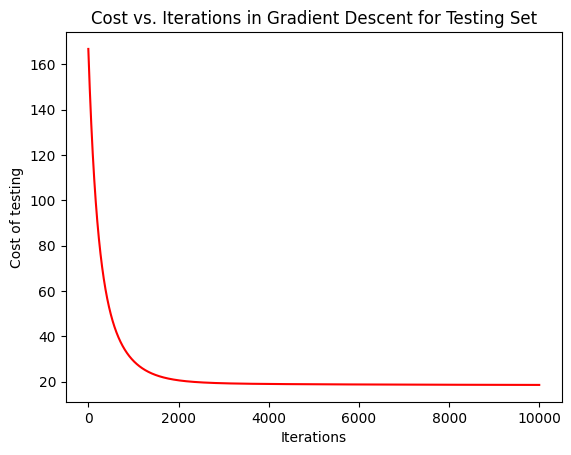

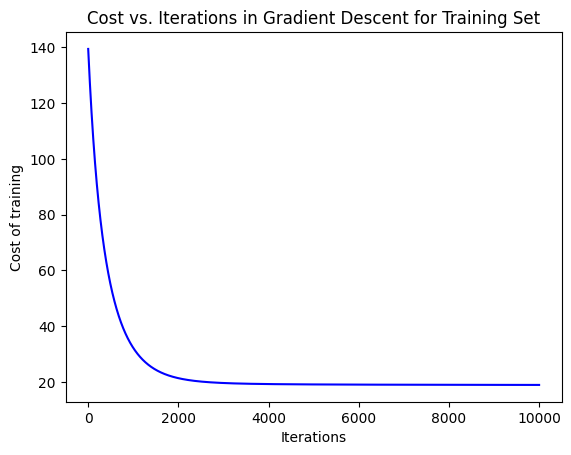

In [ ]:
plt.plot(range(iterations), cost2, color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost of testing")
plt.title("Cost vs. Iterations in Gradient Descent for Testing Set")
plt.show()
plt.plot(range(iterations), cost1, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost of training")
plt.title("Cost vs. Iterations in Gradient Descent for Training Set")
plt.show()

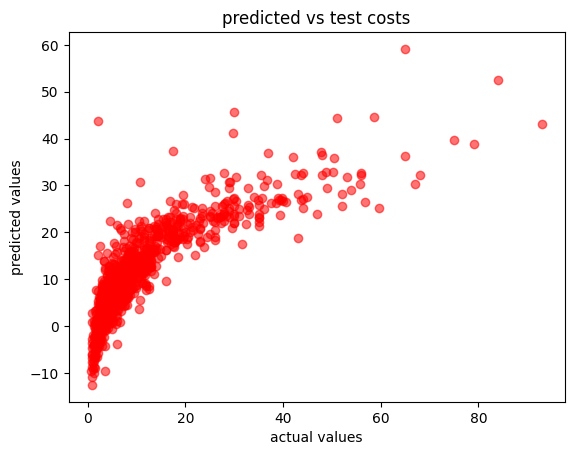

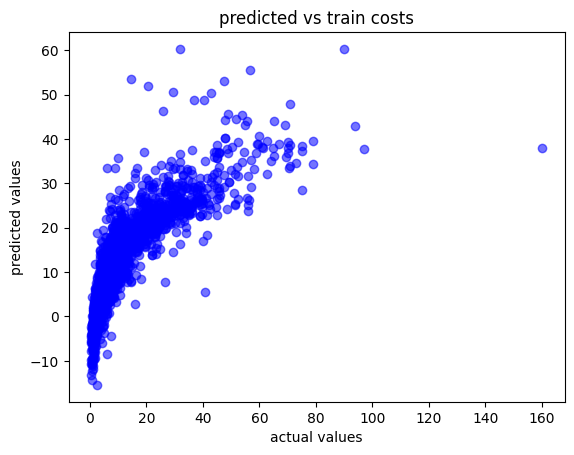

In [ ]:
plt.scatter(test_price,pred_cost2,color='red',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs test costs')
plt.show()
plt.scatter(train_price,pred_cost1,color='blue',alpha=0.55)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('predicted vs train costs')
plt.show()